# Summary and Plot the result

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns
import pandas as pd
import numpy as np
import os

from utils import *

plt.style.use(['science', 'ieee'])

## Dependent Noise results

In [4]:
# Get all the folder names in results/ , starting with numbers

folders = [f for f in os.listdir('results/dependence') if f[0].isdigit()]

In [5]:
# Get the number of nodes and dependence proportion from the folder names

node_nums = np.array([int(f.split('_')[3][4:]) for f in folders])
node_nums = np.unique(node_nums)
node_nums.sort()

dep_props = np.array([int(f.split('_')[-1][4:]) for f in folders])
dep_props = np.unique(dep_props)
dep_props.sort()

flow_types = ['Noflow', 'IAF', 'NOTEARS']

In [32]:
# Result

res_fdr = np.zeros((len(node_nums), len(dep_props), len(flow_types)))
res_tpr = np.zeros((len(node_nums), len(dep_props), len(flow_types)))
res_fpr = np.zeros((len(node_nums), len(dep_props), len(flow_types)))
res_shd = np.zeros((len(node_nums), len(dep_props), len(flow_types)))
res_nnz = np.zeros((len(node_nums), len(dep_props), len(flow_types)))

for i, node_num in enumerate(node_nums):
    for j, dep_prop in enumerate(dep_props):
        for k, flow_type in enumerate(flow_types):
            folder = [f for f in folders if f.endswith(f'{flow_type}_node{node_num}_prop{dep_prop}')][0]
            pred_G = np.loadtxt(f'results/dependence/{folder}/predG.txt', delimiter=' ').reshape(node_num, node_num)
            true_G = np.loadtxt(f'results/dependence/{folder}/trueG.txt', delimiter=' ').reshape(node_num, node_num)
            pred_G[np.abs(pred_G) < 0.3] = 0
            fdr, tpr, fpr, shd, nnz = count_accuracy(nx.DiGraph(true_G), nx.DiGraph(pred_G))
            res_fdr[i, j, k] = fdr
            res_tpr[i, j, k] = tpr
            res_fpr[i, j, k] = fpr
            res_shd[i, j, k] = shd
            res_nnz[i, j, k] = nnz


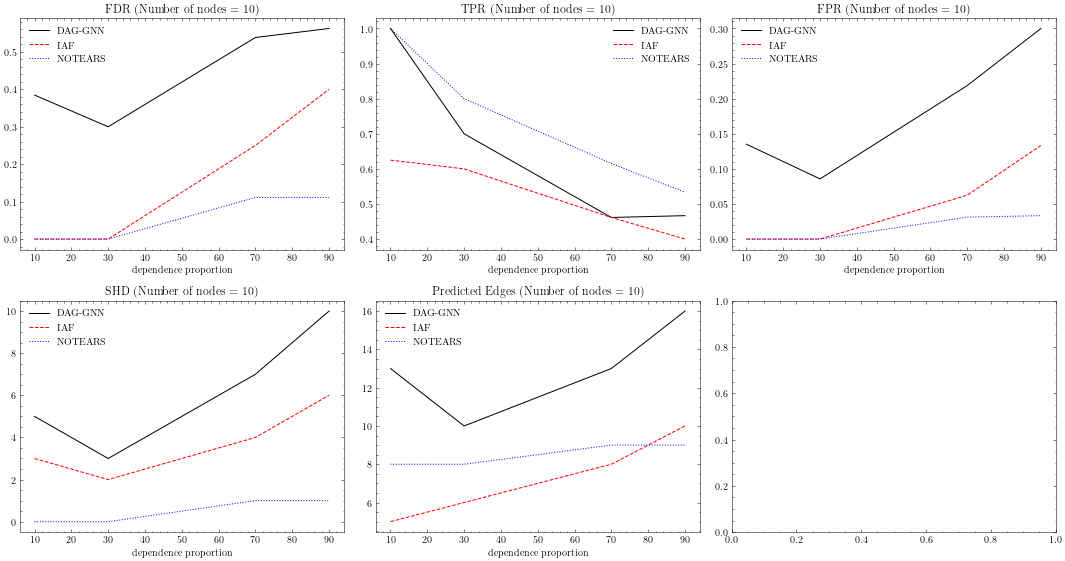

In [33]:
# Plot
all_res = {'FDR': res_fdr, 'TPR': res_tpr, 'FPR': res_fpr, 'SHD': res_shd, 'Predicted Edges': res_nnz}

n_plot = len(node_nums) * len(all_res)

fig, axes = plt.subplots((n_plot//3)+1, 3, figsize=(15, 5 * n_plot // 3))

for idx, m in enumerate(node_nums):
    for i, (metric, res) in enumerate(all_res.items()):
        ax = axes[i // 3, i % 3]
        for k, flow_type in enumerate(flow_types):
            ax.plot(dep_props, res[idx, :, k], label=flow_type)
        ax.set_title(f'{metric} (Number of nodes = {m})')
        ax.set_xlabel('dependence proportion')
        ax.legend(['DAG-GNN', 'IAF', 'NOTEARS'])

plt.tight_layout()

plt.savefig('plots/summary.png', dpi=300, facecolor='white')

In [34]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

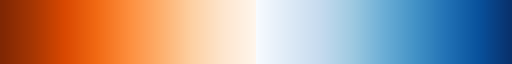

In [35]:
newcmp

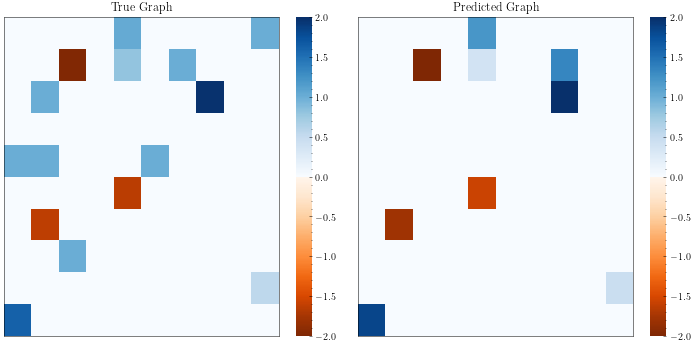

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.heatmap(true_G, cmap=newcmp, ax=axes[0], vmin=-2, vmax=2)
axes[0].set_title('True Graph')
for _, spine in axes[0].spines.items():
    spine.set_visible(True)
axes[0].set_xticks([])
axes[0].set_yticks([])

sns.heatmap(pred_G, cmap=newcmp, ax=axes[1], vmin=-2, vmax=2)
axes[1].set_title('Predicted Graph')
for _, spine in axes[1].spines.items():
    spine.set_visible(True)
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.tight_layout()

In [66]:
def plot_comparison(node_num, dep_prop):
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    for idx, ax in enumerate(axes.ravel()):
        ax.set_xticks([])
        ax.set_yticks([])
        for _, spine in ax.spines.items():
            spine.set_visible(True)

        if idx != 3:
            ax.set_title(f'{flow_types[idx]}')
            folder = [f for f in folders if f.endswith(f'{flow_types[idx]}_node{node_num}_prop{dep_prop}')][0]
            pred_G = np.loadtxt(f'results/dependence/{folder}/predG.txt', delimiter=' ').reshape(node_num, node_num)
            true_G = np.loadtxt(f'results/dependence/{folder}/trueG.txt', delimiter=' ').reshape(node_num, node_num)
            pred_G[np.abs(pred_G) < 0.3] = 0
            sns.heatmap(pred_G, cmap=newcmp, ax=ax, vmin=-2, vmax=2)
        else:
            ax.set_title('True Graph')
            sns.heatmap(true_G, cmap=newcmp, ax=ax, vmin=-2, vmax=2)
            
    plt.tight_layout()
    plt.show()

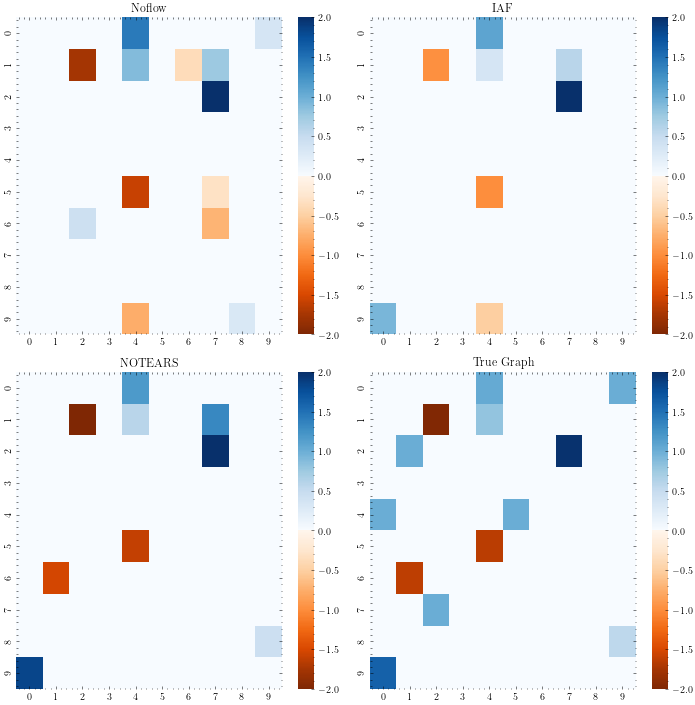

In [67]:
plot_comparison(10, 70)